In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import json
import io

## 95th percentile of latency under load

In [2]:
up_df = pd.read_csv('data/LUL_upstream_95pc_rtt_max.csv')
down_df = pd.read_csv('data/LUL_downstream_95pc_rtt_max.csv')
up_df['dtime per 30 days'] = pd.to_datetime(up_df['dtime per 30 days'], format='%Y-%m-%d')
down_df['dtime per 30 days'] = pd.to_datetime(down_df['dtime per 30 days'], format='%Y-%m-%d')
down_df['Downstream LUL'] = down_df['Downstream LUL'].str.replace(",","").astype(float)
up_df['Upstream LUL'] = up_df['Upstream LUL'].str.replace(",","").astype(float)


# Convert time series with index Month
up_df.index = up_df['dtime per 30 days']
down_df.index = down_df['dtime per 30 days']
del up_df['dtime per 30 days']
del down_df['dtime per 30 days']
print(up_df.head())
print(down_df.head())

                   Upstream LUL
dtime per 30 days              
2011-12-22             2222.927
2012-01-21             2209.962
2012-02-20             2205.582
2012-03-21             2173.747
2012-04-20             2164.544
                   Downstream LUL
dtime per 30 days                
2011-12-22               1338.028
2012-01-21               1444.847
2012-02-20               1380.341
2012-03-21               1316.748
2012-04-20               1247.911


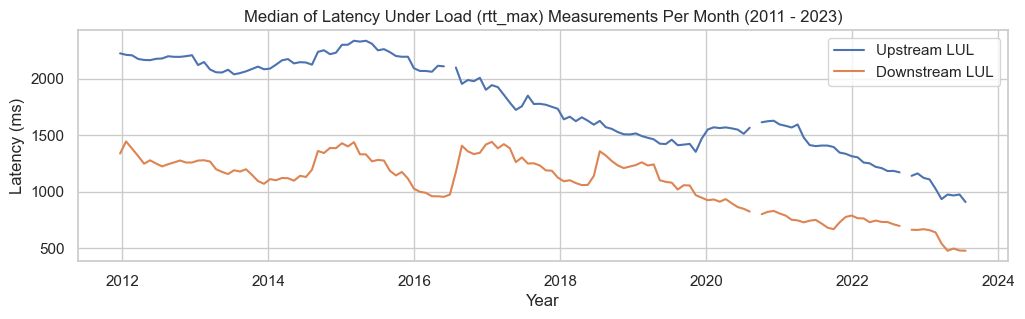

In [3]:
# Plot
sns.set_theme(style="whitegrid")
#sns.lineplot(df)
#plt.plot(df, color="blue", label="PC99")
plt.figure(figsize=(12,3))
plt.plot(up_df, label="Upstream LUL")
plt.plot(down_df, label="Downstream LUL")
plt.ylabel('Latency (ms)')
plt.xlabel('Year')
plt.title('Median of Latency Under Load (rtt_max) Measurements Per Month (2011 - 2023)')
plt.legend(loc="best")
plt.xlabel('Year')
plt.show()

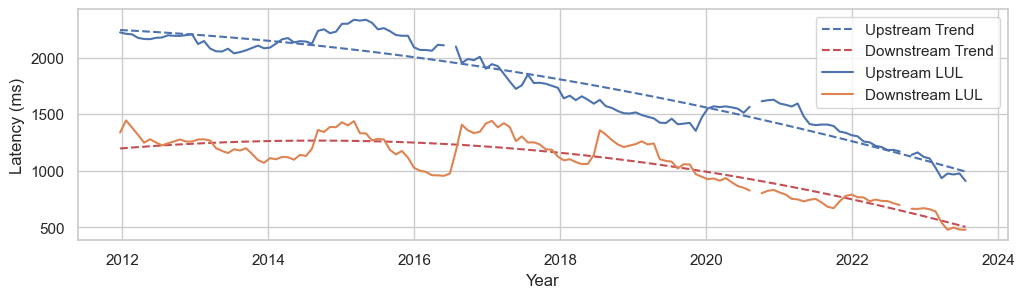

In [4]:
x_dates = up_df.index
x_num = dates.date2num(x_dates)
up_y = up_df['Upstream LUL']
down_y = down_df['Downstream LUL']
up_idx = np.isfinite(up_y) & np.isfinite(x_num)
down_idx = np.isfinite(down_y) & np.isfinite(x_num)

# Calculate fit line
up_trend = np.polyfit(x_num[up_idx], up_y[up_idx], 2)
up_fit = np.poly1d(up_trend)

down_trend = np.polyfit(x_num[down_idx], down_y[down_idx], 2)
down_fit = np.poly1d(down_trend)

# Not really necessary to convert the values back into dates
#but added as a demonstration in case one wants to plot non-linear curves
x_fit = np.linspace(x_num.min(), x_num.max())
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,3))
plt.plot(dates.num2date(x_fit), up_fit(x_fit), "b--", label="Upstream Trend")
plt.plot(dates.num2date(x_fit), down_fit(x_fit), "r--", label="Downstream Trend")
plt.plot(up_df, label="Upstream LUL")
plt.plot(down_df, label="Downstream LUL")
plt.ylabel('Latency (ms)')
plt.xlabel('Year')
# plt.title('Median of Latency Under Load (rtt_max) Measurements Per Month (2011 - 2023)')
plt.legend(loc="best")
plt.xlabel('Year')

# And show
plt.show()

## 95th percentile of downstream LUL by technology

In [5]:
df = pd.read_csv('data/95th Percentile of rtt_max over time - Downstream LUL.csv')
df['time per 30 days'] = pd.to_datetime(df['time per 30 days'], format='%Y-%m-%d')
df['Latency'] = df['Latency'].str.replace(",","").astype(float)
df.head()

,Top 3 values of operator_technology,time per 30 days,Latency
0,Cable,2011-12-22,1078.128
1,Cable,2012-01-21,1213.429
2,Cable,2012-02-20,1147.298
3,Cable,2012-03-21,1118.252
4,Cable,2012-04-20,1094.866


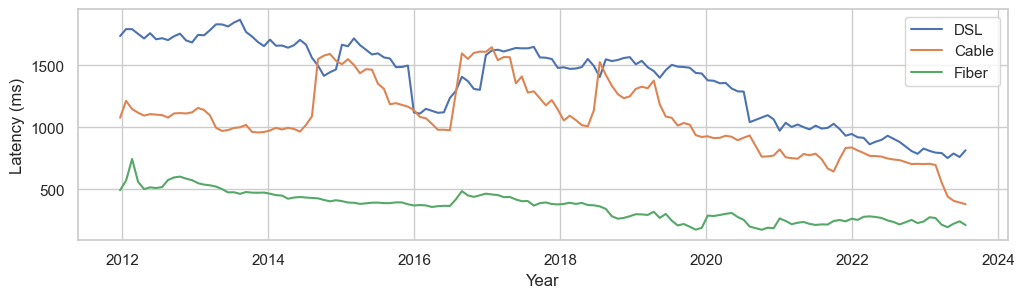

In [6]:
# General plot again
plt.figure(figsize=(12,3))
sns.set_theme(style="whitegrid")

for tech in ["DSL", "Cable", "Fiber"]:
    temp_df = df[df["Top 3 values of operator_technology"] == tech]
    x_dates = temp_df["time per 30 days"]
    x_num = dates.date2num(x_dates)
    y = temp_df['Latency']
    idx = np.isfinite(y) & np.isfinite(x_num)
    x_fit = np.linspace(x_num.min(), x_num.max())

    # plt.plot(dates.num2date(x_fit), fit(x_fit), "r--", label=f"{tech} Trend")
    plt.plot(x_dates, y, label=f"{tech}")

plt.ylabel('Latency (ms)')
plt.xlabel('Year')
# plt.title(f"Median of Downstream LUL (rtt_max) Measurements Per Month (2011 - 2023) by technology")
plt.legend(loc="best")
# And show
plt.show()

In [7]:
def plot_95pc_lul_by_tech(tech):
    temp_df = df[df["Top 3 values of operator_technology"] == tech]
    x_dates = temp_df["time per 30 days"]
    x_num = dates.date2num(x_dates)
    y = temp_df['Latency']
    idx = np.isfinite(y) & np.isfinite(x_num)

    # Calculate fit line
    trend = np.polyfit(x_num[idx], y[idx], 3)
    fit = np.poly1d(trend)

    # General plot again
    plt.figure(figsize=(12,3))

    x_fit = np.linspace(x_num.min(), x_num.max())
    sns.set_theme(style="whitegrid")
    plt.plot(dates.num2date(x_fit), fit(x_fit), "r--", label="Trend")
    plt.plot(x_dates, y, label="Median latency")
    plt.ylabel('Latency (ms)')
    plt.xlabel('Year')
    plt.title(f"95th percentile of Downstream LUL by technology (2012 – 2023) for {tech}")
    plt.legend(loc="best")
    plt.xlabel('Year')

    # And show
    plt.show()

### Cable

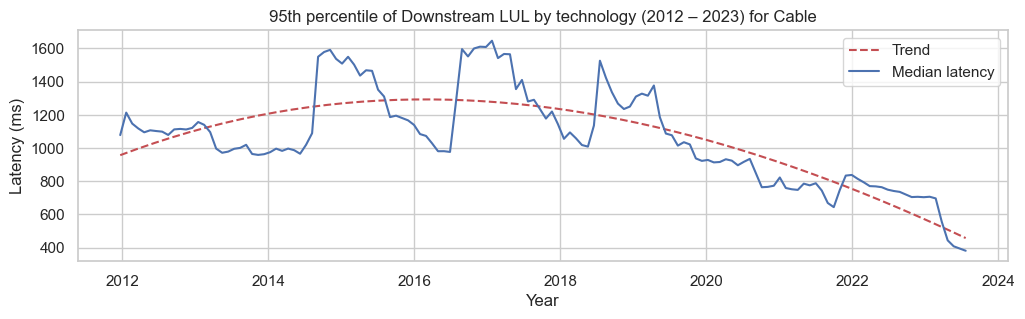

In [8]:
plot_95pc_lul_by_tech("Cable")

### Fiber

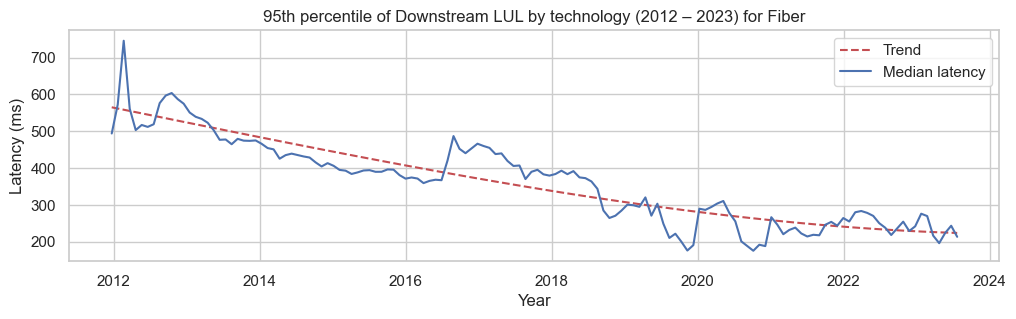

In [9]:
plot_95pc_lul_by_tech("Fiber")

### DSL

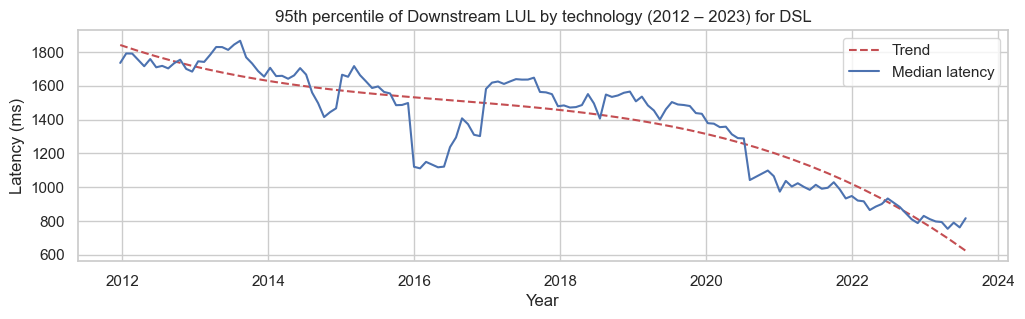

In [10]:
plot_95pc_lul_by_tech("DSL")

## 95th percentile of upstream LUL by technology

In [11]:
df = pd.read_csv('data/95th Percentile of rtt_max over time - Upstream LUL.csv')
df['time per 30 days'] = pd.to_datetime(df['time per 30 days'], format='%Y-%m-%d')
df['Latency'] = df['Latency'].str.replace(",","").astype(float)
df.head()

,Top 3 values of operator_technology,time per 30 days,Latency
0,Cable,2011-12-22,2179.143
1,Cable,2012-01-21,2181.383
2,Cable,2012-02-20,2196.523
3,Cable,2012-03-21,2134.460
4,Cable,2012-04-20,2145.526


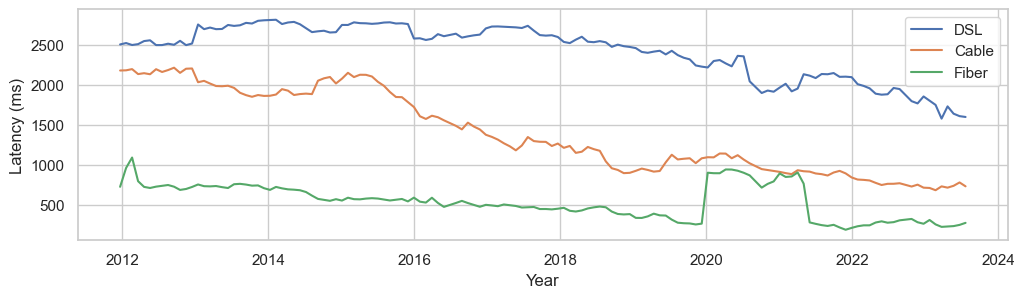

In [12]:
# General plot again
plt.figure(figsize=(12,3))
sns.set_theme(style="whitegrid")

for tech in ["DSL", "Cable", "Fiber"]:
    temp_df = df[df["Top 3 values of operator_technology"] == tech]
    x_dates = temp_df["time per 30 days"]
    x_num = dates.date2num(x_dates)
    y = temp_df['Latency']
    idx = np.isfinite(y) & np.isfinite(x_num)
    x_fit = np.linspace(x_num.min(), x_num.max())

    # plt.plot(dates.num2date(x_fit), fit(x_fit), "r--", label=f"{tech} Trend")
    plt.plot(x_dates, y, label=f"{tech}")

plt.ylabel('Latency (ms)')
plt.xlabel('Year')
# plt.title(f"Median of Downstream LUL (rtt_max) Measurements Per Month (2011 - 2023) by technology")
plt.legend(loc="best")
# And show
plt.show()

In [13]:
def plot_95pc_up_lul_by_tech(tech):
    temp_df = df[df["Top 3 values of operator_technology"] == tech]
    x_dates = temp_df["time per 30 days"]
    x_num = dates.date2num(x_dates)
    y = temp_df['Latency']
    idx = np.isfinite(y) & np.isfinite(x_num)

    # Calculate fit line
    trend = np.polyfit(x_num[idx], y[idx], 3)
    fit = np.poly1d(trend)

    # General plot again
    plt.figure(figsize=(12,3))

    x_fit = np.linspace(x_num.min(), x_num.max())
    sns.set_theme(style="whitegrid")
    plt.plot(dates.num2date(x_fit), fit(x_fit), "r--", label="Trend")
    plt.plot(x_dates, y, label="Median latency")
    plt.ylabel('Latency (ms)')
    plt.xlabel('Year')
    plt.title(f"95th percentile of Upstream LUL by technology (2012 – 2023) for {tech}")
    plt.legend(loc="best")
    plt.xlabel('Year')

    # And show
    plt.show()

### Cable

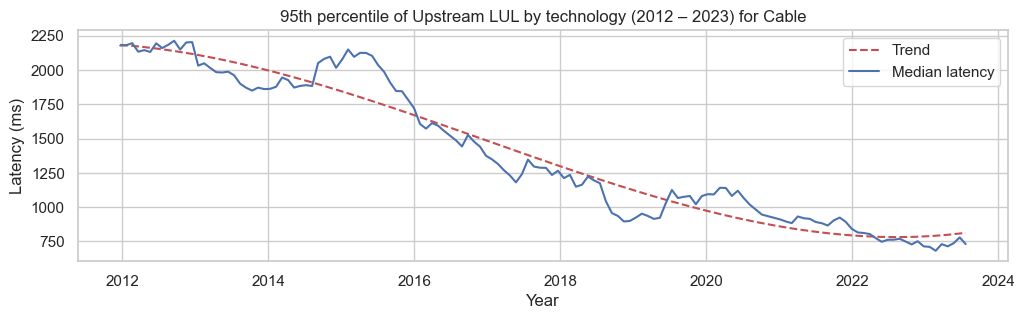

In [14]:
plot_95pc_up_lul_by_tech("Cable")

### Fiber

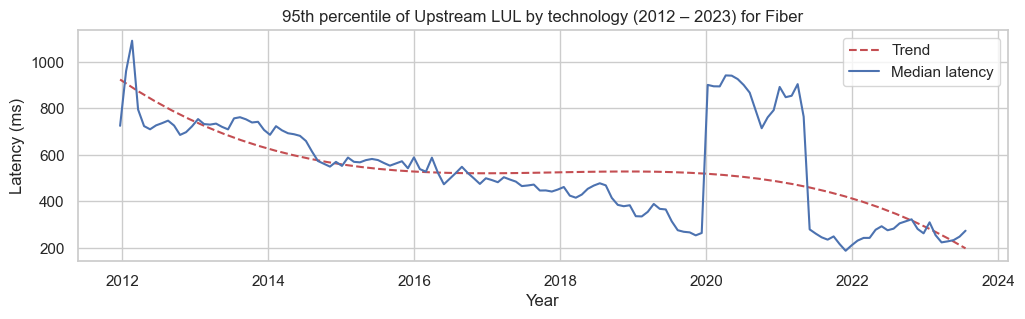

In [15]:
plot_95pc_up_lul_by_tech("Fiber")

### DSL

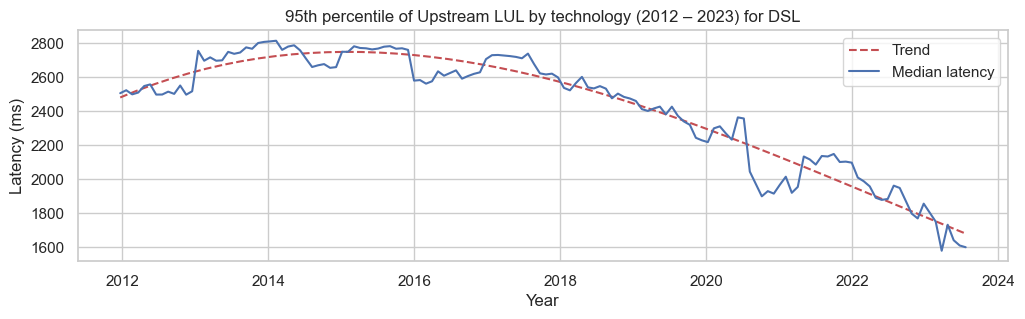

In [16]:
plot_95pc_up_lul_by_tech("DSL")

## Percentage of data less than 100ms for Downstream LUL

In [17]:
df = pd.read_csv('data/Percentage of data less than 100 ms - downstream LUL.csv')
df['dtime per 30 days'] = pd.to_datetime(df['dtime per 30 days'], format='%Y-%m-%d')
df['Percentage'] = df['Percentage'].str.replace("%","").astype(float)
df.head()

,Top 3 values of operator_technology,dtime per 30 days,Percentage
0,Cable,2010-12-27,NaN
1,Cable,2011-01-26,42.97
2,Cable,2011-02-25,49.40
3,Cable,2011-03-27,51.07
4,Cable,2011-04-26,50.95


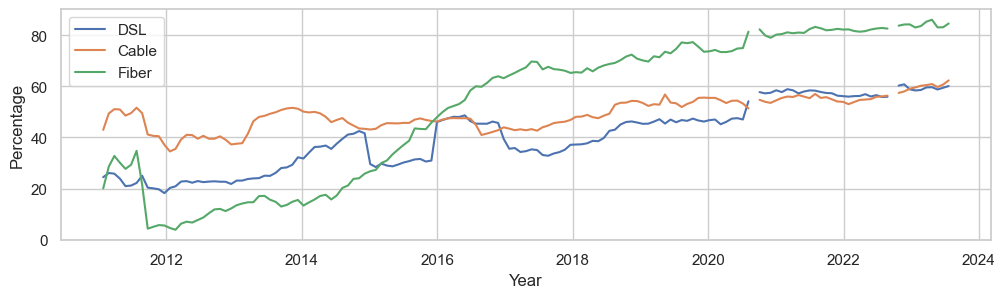

In [18]:
# General plot again
plt.figure(figsize=(12,3))
sns.set_theme(style="whitegrid")

for tech in ["DSL", "Cable", "Fiber"]:
    temp_df = df[df["Top 3 values of operator_technology"] == tech]
    x_dates = temp_df["dtime per 30 days"]
    x_num = dates.date2num(x_dates)
    y = temp_df['Percentage']
    idx = np.isfinite(y) & np.isfinite(x_num)
    x_fit = np.linspace(x_num.min(), x_num.max())

    # Calculate fit line
    # trend = np.polyfit(x_num[idx], y[idx], 2)
    # fit = np.poly1d(trend)


    # plt.plot(dates.num2date(x_fit), fit(x_fit), "r--", label=f"{tech} Trend")
    plt.plot(x_dates, y, label=f"{tech}")

plt.ylabel('Percentage')
plt.xlabel('Year')
# plt.title(f"Median of Idle Latency Measurements Per Month by Technology (2011 – 2023)")
plt.legend(loc="best")
# And show
plt.show()

## Percentage of data less than 100ms for Upstream LUL

In [19]:
df = pd.read_csv('data/Percentage of data less than 100 ms - upstream LUL.csv')
df['dtime per 30 days'] = pd.to_datetime(df['dtime per 30 days'], format='%Y-%m-%d')
df['Percentage'] = df['Percentage'].str.replace("%","").astype(float)
df.head()

,Top 3 values of operator_technology,dtime per 30 days,Percentage
0,Cable,2010-12-27,NaN
1,Cable,2011-01-26,5.82
2,Cable,2011-02-25,10.37
3,Cable,2011-03-27,11.34
4,Cable,2011-04-26,9.32


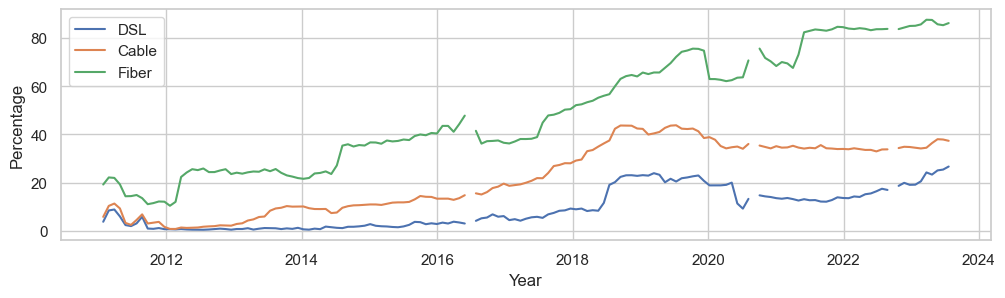

In [20]:
# General plot again
plt.figure(figsize=(12,3))
sns.set_theme(style="whitegrid")

for tech in ["DSL", "Cable", "Fiber"]:
    temp_df = df[df["Top 3 values of operator_technology"] == tech]
    x_dates = temp_df["dtime per 30 days"]
    x_num = dates.date2num(x_dates)
    y = temp_df['Percentage']
    idx = np.isfinite(y) & np.isfinite(x_num)
    x_fit = np.linspace(x_num.min(), x_num.max())

    # Calculate fit line
    # trend = np.polyfit(x_num[idx], y[idx], 2)
    # fit = np.poly1d(trend)


    # plt.plot(dates.num2date(x_fit), fit(x_fit), "r--", label=f"{tech} Trend")
    plt.plot(x_dates, y, label=f"{tech}")

plt.ylabel('Percentage')
plt.xlabel('Year')
# plt.title(f"Median of Idle Latency Measurements Per Month by Technology (2011 – 2023)")
plt.legend(loc="best")
# And show
plt.show()